In [1]:
import torch
from torch import nn
import torch.nn.functional as F

In [2]:
X = torch.randn(5,4)
print(X)
mask = (torch.rand(X.shape) > 0.1).float() 
mask * X

tensor([[-0.0400, -0.8240,  0.5436,  0.0522],
        [-1.3801, -0.5592, -0.5592, -1.3681],
        [ 0.1404,  0.5938, -1.1373,  0.2863],
        [-1.7790, -0.1662, -1.1009, -1.0696],
        [-0.3963,  0.2075, -0.4963, -0.6525]])


tensor([[-0.0400, -0.8240,  0.5436,  0.0522],
        [-1.3801, -0.5592, -0.5592, -1.3681],
        [ 0.0000,  0.0000, -1.1373,  0.0000],
        [-1.7790, -0.1662, -1.1009, -1.0696],
        [-0.0000,  0.2075, -0.4963, -0.0000]])

In [3]:
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1:
        return torch.zeros_like(X)
    mask = (torch.randn(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [4]:
X = torch.arange(16, dtype = torch.float32).reshape((2, 8))
print('dropout_p = 0:', dropout_layer(X, 0))
print('dropout_p = 0.5:', dropout_layer(X, 0.5))
print('dropout_p = 1:', dropout_layer(X, 1))

dropout_p = 0: tensor([[ 0.,  1.,  2.,  0.,  0.,  5.,  0.,  7.],
        [ 8.,  9., 10., 11., 12., 13.,  0.,  0.]])
dropout_p = 0.5: tensor([[ 0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.],
        [16.,  0., 20., 22.,  0.,  0., 28.,  0.]])
dropout_p = 1: tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [9]:
from d2l_common import Classifier


class DropoutMLPScartch(Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2, dropout_1, dropout_2, lr):
        super().__init__()
        # self.lin1 = nn.LazyLinear(num_hiddens_1)
        # self.lin2 = nn.LazyLinear(num_hiddens_2)
        # self.lin3 = nn.LazyLinear(num_outputs)
        # self.dropout_1 = dropout_1
        # self.dropout_2 = dropout_2
        # self.lr = lr
        # self.relu = nn.ReLU()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(num_hiddens_1),
            nn.ReLU(),
            nn.Dropout(dropout_1),
            nn.LazyLinear(num_hiddens_2),
            nn.ReLU(),
            nn.Dropout(dropout_2),
            nn.LazyLinear(num_outputs)
        )
        self.lr = lr

    def forward(self, X):
        return self.net(X)

/Users/tangyun/opt/miniconda3/envs/rl/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


complete 0 epoch train_loss=0.8725035786628723 validate_loss=0.4446943998336792
complete 1 epoch train_loss=0.4713399112224579 validate_loss=0.2939286530017853
complete 2 epoch train_loss=0.4511021375656128 validate_loss=0.28626441955566406
complete 3 epoch train_loss=0.6534056067466736 validate_loss=0.2703307271003723
complete 4 epoch train_loss=0.6343695521354675 validate_loss=0.2846616804599762
complete 5 epoch train_loss=0.6243205666542053 validate_loss=0.23976893723011017
complete 6 epoch train_loss=0.4625832140445709 validate_loss=0.2105945199728012
complete 7 epoch train_loss=0.3906605541706085 validate_loss=0.20661604404449463
complete 8 epoch train_loss=0.4775608479976654 validate_loss=0.2897712290287018
complete 9 epoch train_loss=0.38804110884666443 validate_loss=0.22083492577075958


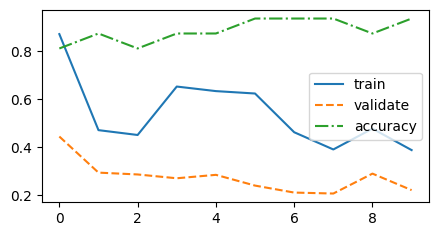

In [10]:
from d2l_common import Trainer, FasionMNIST
hparams = {'num_outputs': 10, 'num_hiddens_1': 256,
           'num_hiddens_2': 256, 'dropout_1': 0.5, 'dropout_2': 0.5, 'lr': 0.1}
model = DropoutMLPScartch(**hparams)
data = FasionMNIST(batch_size=256)
trainer = Trainer(max_epochs=10)
trainer.fit(model, data)
trainer.plot()

complete 0 epoch train_loss=0.6777341961860657 validate_loss=0.39415639638900757
complete 1 epoch train_loss=0.8535544276237488 validate_loss=0.46395954489707947
complete 2 epoch train_loss=0.5928524136543274 validate_loss=0.30416184663772583
complete 3 epoch train_loss=0.3585631549358368 validate_loss=0.24309076368808746
complete 4 epoch train_loss=0.4032710790634155 validate_loss=0.29795539379119873
complete 5 epoch train_loss=0.3337055742740631 validate_loss=0.2823652923107147
complete 6 epoch train_loss=0.44132837653160095 validate_loss=0.22670938074588776
complete 7 epoch train_loss=0.42164385318756104 validate_loss=0.21670790016651154
complete 8 epoch train_loss=0.5462092757225037 validate_loss=0.19367694854736328
complete 9 epoch train_loss=0.32740363478660583 validate_loss=0.20347636938095093


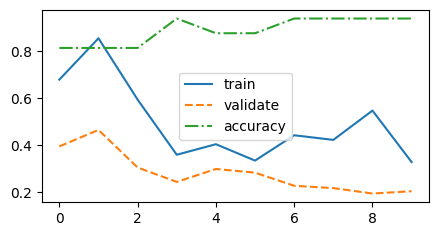

In [11]:
from d2l_common import Trainer, FasionMNIST
hparams = {'num_outputs': 10, 'num_hiddens_1': 256,
           'num_hiddens_2': 256, 'dropout_1': 0.2, 'dropout_2': 0.2, 'lr': 0.1}
model = DropoutMLPScartch(**hparams)
data = FasionMNIST(batch_size=256)
trainer = Trainer(max_epochs=10)
trainer.fit(model, data)
trainer.plot()